# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

## LAB P.H.4.1: Clustering con HDBSCAN
Creado por Pablo Casas | https://escueladedatosvivos.ai    

### ¿Qué vimos?
    
- Clustering con k-means
- Validación de modelos de cluster: coord_plot y promedios 

### Objetivo

- Crear modelo HDBSCAN
- Analizar puntos de ruido
- Análisis de silhouette


In [1]:
import pandas as pd
import seaborn as sns
from funpymodeling.exploratory import freq_tbl, status, cat_vars
import numpy as np

### 1) Carga y preparación de datos

In [2]:
# Fuente: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md
data=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_id,0,0.000000,0,0.000000,28356,object
1,track_name,5,0.000152,0,0.000000,23449,object
2,track_artist,5,0.000152,0,0.000000,10692,object
3,track_popularity,0,0.000000,2703,0.082326,101,int64
4,track_album_id,0,0.000000,0,0.000000,22545,object
5,track_album_name,5,0.000152,0,0.000000,19743,object
6,track_album_release_date,0,0.000000,0,0.000000,4530,object
7,playlist_name,0,0.000000,0,0.000000,449,object
8,playlist_id,0,0.000000,0,0.000000,471,object
9,playlist_genre,0,0.000000,0,0.000000,6,object


Removemos duplicados de canciones:

In [3]:
data=data.drop_duplicates(subset="track_id")

In [4]:
len(data)

28356

### 2) Preparación de datos

In [5]:
x_data=data.drop(cat_vars(data), axis=1)

# saquemos otras...
x_data=x_data.drop(['key','speechiness', 'mode', 'tempo', 'duration_ms'], axis=1)

In [6]:
status(x_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_popularity,0,0.0,2620,0.092397,101,int64
1,danceability,0,0.0,1,0.000035,822,float64
2,energy,0,0.0,0,0.000000,952,float64
3,loudness,0,0.0,0,0.000000,10222,float64
4,acousticness,0,0.0,1,0.000035,3731,float64
5,instrumentalness,0,0.0,10175,0.358831,4729,float64
6,liveness,0,0.0,1,0.000035,1624,float64
7,valence,0,0.0,1,0.000035,1362,float64


### 3) Creación del modelo

Doc oficial: https://hdbscan.readthedocs.io/en/latest/

Ojo: En sklearn esta dbscan (sin la H). Es casi igual pero con más hiperparámetros.
<br>En HDBSCAN encuentra internamente prueba distintos valores (usen este).

In [7]:
#!pip3 install hdbscan

In [8]:
import hdbscan

Generamos el modelo y fiteamos:
Condición todas las variables numéricas y sin nulos.

In [9]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(x_data)

HDBSCAN()

In [10]:
# Nro de cluster
model_hdb.labels_

array([137,  77,  70, ...,  39,  51,  38], dtype=int64)

In [11]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,43,2599,0.091656,0.091656
1,-1,2462,0.086825,0.178481
2,35,526,0.01855,0.197031
3,82,433,0.01527,0.212301
4,85,431,0.0152,0.2275
...,...,...,...,...
165,0,5,0.000176,0.999295
166,11,5,0.000176,0.999471
167,1,5,0.000176,0.999647
168,104,5,0.000176,0.999824


Muchos clusters! **171** 

Y uno de ellos es de ruido (indicado con el `-1`)

### 4) Tuning/regularización de HDBSCAN para menos clusters

In [12]:
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(x_data)

In [13]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,0,14988,0.528565,0.528565
1,-1,10554,0.372196,0.900762
2,3,2413,0.085097,0.985858
3,2,314,0.011073,0.996932
4,1,87,0.003068,1.0


Notar el cluster de ruido. ¿qué cambió?

### 5) Análisis del modelo cluster (profiling)

In [14]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=x_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [15]:
x_data_cl.head()

,track_popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,cluster
0,66,0.748,0.916,-2.634,0.1020,0.000000,0.0653,0.518,0
1,67,0.726,0.815,-4.969,0.0724,0.004210,0.3570,0.693,0
2,70,0.675,0.931,-3.432,0.0794,0.000023,0.1100,0.613,0
3,60,0.718,0.930,-3.778,0.0287,0.000009,0.2040,0.277,0
4,69,0.650,0.833,-4.672,0.0803,0.000000,0.0833,0.725,0


Saquemos el cluster de ruido:

In [16]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

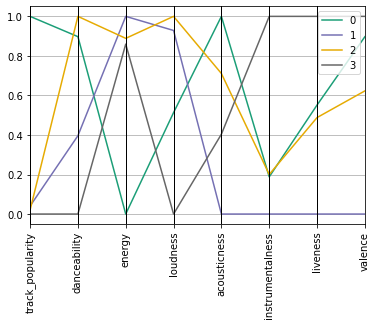

In [17]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [18]:
d_orig

,track_popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,cluster
0,49.489525,0.660905,0.732782,-5.818109,0.144822,0.035734,0.184858,0.523452,0
1,2.000000,0.651908,0.762563,-5.429172,0.096814,0.020734,0.153345,0.494805,1
2,1.000000,0.662745,0.759252,-5.362414,0.130951,0.036694,0.181237,0.514699,2
3,0.000000,0.644800,0.758381,-6.298398,0.116204,0.100462,0.210491,0.526740,3


In [19]:
d_transf

,track_popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,cluster
0,1.000000,0.897429,0.000000,0.513138,1.000000,0.188138,0.551439,0.897034,0
1,0.040413,0.396088,1.000000,0.928676,0.000000,0.000000,0.000000,0.000000,1
2,0.020206,1.000000,0.888803,1.000000,0.711073,0.200181,0.488088,0.622954,2
3,0.000000,0.000000,0.859565,0.000000,0.403897,1.000000,1.000000,1.000000,3


In [20]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

### 6) _Sanity check!_

In [21]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

### 7) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

#### Calculandolo especialmente para HDBSCAN

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(x_data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [23]:
sil_avg

0.02231827112045564

`silhouette_samples` nos da el valor silhouette para cada registro:

In [24]:
sample_silhouette_values = silhouette_samples(x_data, model_hdb2.labels_)

In [25]:
sample_silhouette_values

array([ 0.46985103,  0.46447289,  0.43196502, ..., -0.54662257,
       -0.5027122 ,  0.00376015])

In [26]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})

Nuevo gráfico para observar la distribución

<AxesSubplot:xlabel='cluster', ylabel='sil_value'>

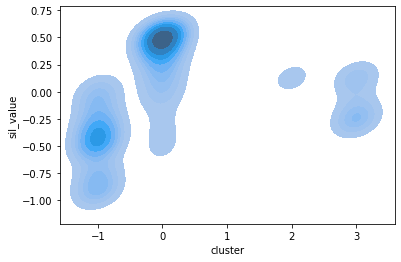

In [28]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [29]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.455551
0,0.375860
1,0.338207
2,0.123999
3,-0.108168


---

## Resumen!

- Modelo de HDBSCAN
- Modificamos el parámetro mas importante `min_cluster_size`: 
- Exploramos el modelo con `coord_plot`.
- Calculamos y exploramos la calidad del hdbscan con Silhouette



--- 

## Ejercicios!

1) Este primer ejercicio esta relacionada con el anterior lab que vimos k-means. A este modelo que hicieron, ya sea el que les mostré como el de tarea de los cluster outliers, calculen el Silhouette que vimos en la teoría.

    Busquen la función `silhouette_visualizer` dentro de `yellowbrick`. Interpreten si los modelos con pocos casos son reprersentativos (silhouette > 0.5). Tendrían que ver algo así: 


<img src="https://www.scikit-yb.org/zh/latest/_images/silhouette.png" alt="Drawing" style="width: 400px;"/>


2) En HDBSCAN es mas intuitivo clasificar un nuevo caso. Imaginense que el modelo lo hicieron 1 vez, y luego lo tienen que usar en la práctica.

¿Cómo clasfican un caso nuevo? (pista: googleen dentro de la página oficial de hdbscan)



In [30]:
import pandas as pd
data_new_cases=pd.read_csv("data/spotify_new_cases.csv", index_col=0)

In [31]:
data_new_cases

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
24,4sqABRRGU7CzcHXCyxUzFw,Do You Mean (feat. Ty Dolla $ign & bülow) - My...,The Chainsmokers,58,5vf16sRhXB2f3sS5kteU2T,Do You Mean - The Remixes (feat. Ty Dolla $ign...,2019-05-24,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-3.785,1,0.0352,0.0163,0.000019,0.395,0.422,110.018,205093
56,3utdq3dPLVD4r7Vv9BnCAI,What Am I - SONDR Remix,Why Don't We,52,1UmAfO69MdjI20N6etueHb,What Am I (SONDR Remix),2019-11-01,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-5.283,0,0.0419,0.0336,0.000084,0.277,0.509,118.020,180361
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.110,0.613,124.008,176616
57,1ppOGANOzMT01Cxh9jx4hN,Cool Kids,Olympis,67,1ZmJJdNN2BAnVqoiU4xtZe,Cool Kids,2019-11-01,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-11.297,1,0.0511,0.4150,0.000031,0.130,0.119,126.100,139048


Para esos 5 casos, googleen como es la función de HDBSCAN que les permite asignar a que cluster pertenecen.

3) Creen un modelo de cluster HDBSCAN parra los datos que habiamos generado en el lab P.D.3.4 (encuesta permanente de hogares).

Busquen 3 o 4 clusters. ¿Hay alguno interesante?

In [32]:
d_eph=pd.read_pickle(r'data/d_eph5.pickle')

In [33]:
d_eph

,sexo_mujer,alfabeto_Si,sistema_salud_Mutual/prepaga/servicio de emergencia/ Planes y Seguros Públicos,sistema_salud_No paga ni le descuentan,sistema_salud_Ns./Nr.,sistema_salud_Obra social (incluye PAMI),sistema_salud_Obra social y mutual/prepaga/servicio de emergencia.,sistema_salud_Planes y seguros públicos,nivel_educativo_Primaria Incompleta(incluye educación especial),nivel_educativo_Secundaria Completa,...,ingreso_15k_si,estado_civil_cat_2,estado_civil_cat_3,estado_civil_cat_4,estado_civil_cat_5,"edad_cat_(32.0, 41.0]","edad_cat_(41.0, 48.0]","edad_cat_(48.0, 57.0]","edad_cat_(57.0, 95.0]",edad_cat_nulo
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3512,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3513,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3514,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
